# Task 2 – Quantitative Analysis of Stock Prices

# Step 0: Setup & Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import mplfinance as mpf

# Configure plotting
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

# Step 1: Load & Prepare Stock Data

In [2]:
# Function to load each stock
def load_stock(file_path, stock_name):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Stock'] = stock_name
    return df

# Load all datasets
stocks = {
    "AAPL": load_stock("../data/AAPL.csv", "AAPL"),
    "AMZN": load_stock("../data/AMZN.csv", "AMZN"),
    "GOOG": load_stock("../data/GOOG.csv", "GOOG"),
    "META": load_stock("../data/META.csv", "META"),
    "MSFT": load_stock("../data/MSFT.csv", "MSFT"),
    "NVDA": load_stock("../data/NVDA.csv", "NVDA")
}

# Combine all stocks
all_stocks = pd.concat(stocks.values())
all_stocks.sort_index(inplace=True)
print("Combined stock dataset preview:")
display(all_stocks.head())

Combined stock dataset preview:


,Close,High,Low,Open,Volume,Stock
Date,,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,AAPL
2009-01-02,2.718000,2.726500,2.553500,2.567500,145928000,AMZN
2009-01-02,14.872976,14.924187,14.170662,14.287715,50084000,MSFT
2009-01-02,0.199652,0.201027,0.184294,0.184982,497124000,NVDA
2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322,GOOG


# 2. Basic EDA

Stock
AAPL    3774
AMZN    3774
MSFT    3774
NVDA    3774
GOOG    3774
META    2923
Name: count, dtype: int64


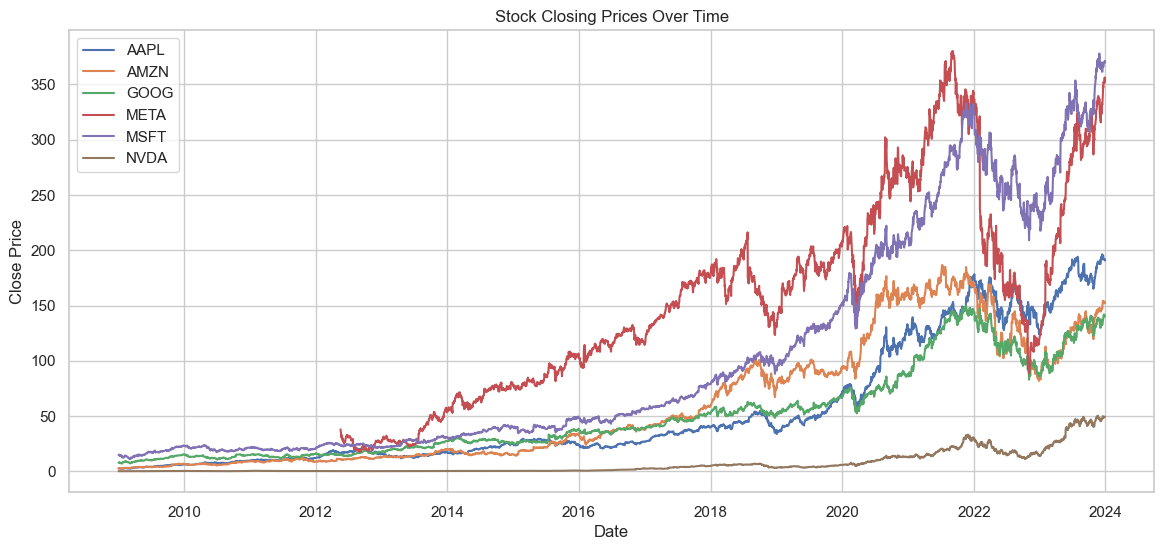

In [3]:
# Number of rows per stock
stock_counts = all_stocks['Stock'].value_counts()
print(stock_counts)

# Closing price trends for all stocks
plt.figure(figsize=(14,6))
for stock in stocks.keys():
    subset = all_stocks[all_stocks['Stock'] == stock]
    plt.plot(subset.index, subset['Close'], label=stock)
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# 3. Add Technical Indicators using TA-Lib

In [8]:
# Apply technical indicators for all stocks
for key in stocks.keys():
    df = stocks[key]
    
    # Moving Averages
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)
    df['EMA_20'] = ta.EMA(df['Close'], timeperiod=20)
    
    # RSI
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # MACD
    macd, signal, hist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = signal
    
    # Daily Returns & Volatility
    df['Daily_Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Daily_Return'].rolling(20).std() * np.sqrt(252)
    
    stocks[key] = df 

# 4. Visualize Indicators for Each Stock

In [9]:
# Plot Close Price with SMA and EMA
def plot_price_ma(stock_df, stock_name):
    plt.figure(figsize=(14,6))
    plt.plot(stock_df.index, stock_df['Close'], label='Close Price', color='black')
    plt.plot(stock_df.index, stock_df['SMA_20'], label='SMA 20', color='blue')
    plt.plot(stock_df.index, stock_df['SMA_50'], label='SMA 50', color='orange')
    plt.plot(stock_df.index, stock_df['EMA_20'], label='EMA 20', color='green')
    plt.title(f"{stock_name} Close Price & Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Plot RSI
def plot_rsi(stock_df, stock_name):
    plt.figure(figsize=(14,4))
    plt.plot(stock_df.index, stock_df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f"{stock_name} RSI")
    plt.legend()
    plt.show()

# Plot MACD
def plot_macd(stock_df, stock_name):
    plt.figure(figsize=(14,4))
    plt.plot(stock_df.index, stock_df['MACD'], label='MACD', color='blue')
    plt.plot(stock_df.index, stock_df['MACD_signal'], label='Signal', color='red')
    plt.title(f"{stock_name} MACD")
    plt.legend()
    plt.show()

# Plot Daily Returns
def plot_daily_returns(stock_df, stock_name):
    plt.figure(figsize=(14,4))
    plt.plot(stock_df.index, stock_df['Daily_Return'], label='Daily Return', color='brown')
    plt.title(f"{stock_name} Daily Returns")
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.show()

# Plot Volatility
def plot_volatility(stock_df, stock_name):
    plt.figure(figsize=(14,4))
    plt.plot(stock_df.index, stock_df['Volatility'], label='20-day Annualized Volatility', color='magenta')
    plt.title(f"{stock_name} Volatility")
    plt.legend()
    plt.show()

# Generate Plots for All Stocks

--- AAPL ---


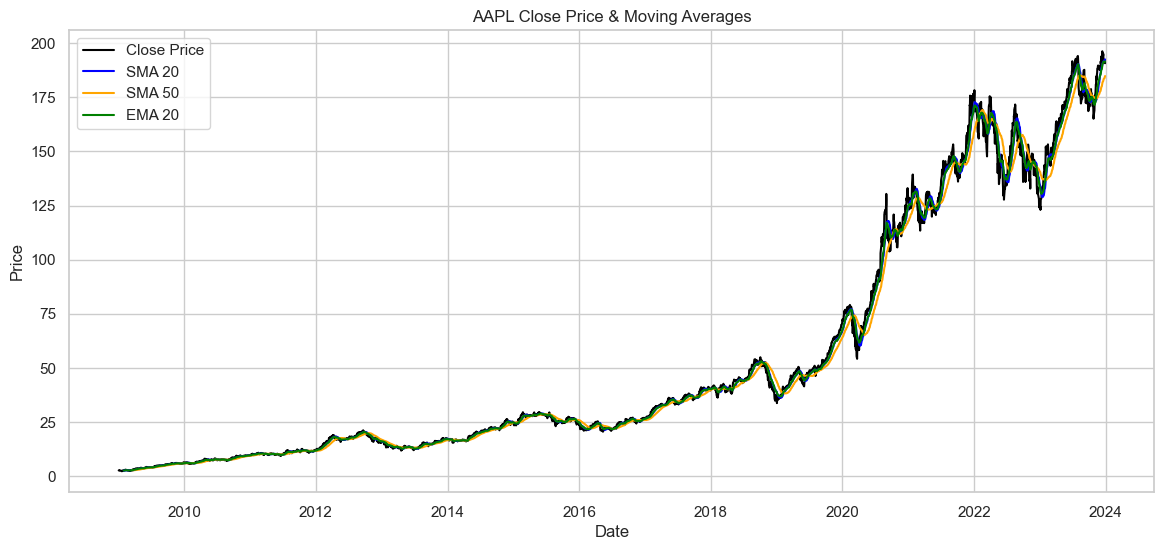

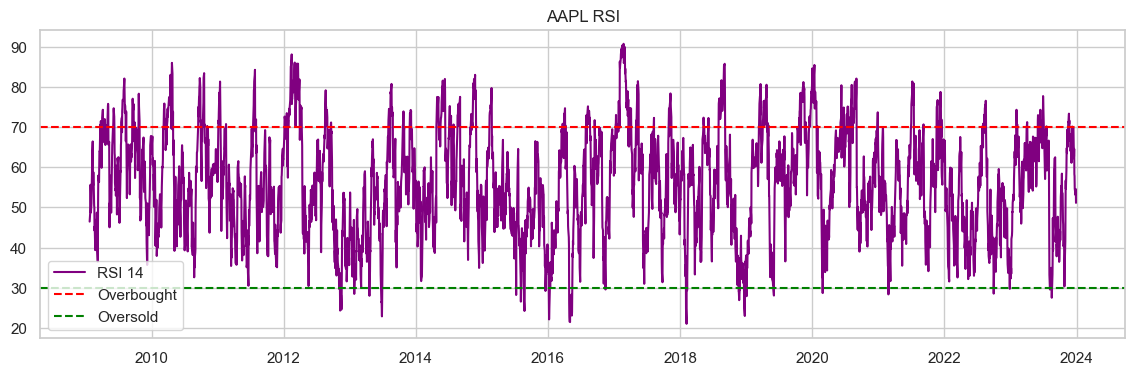

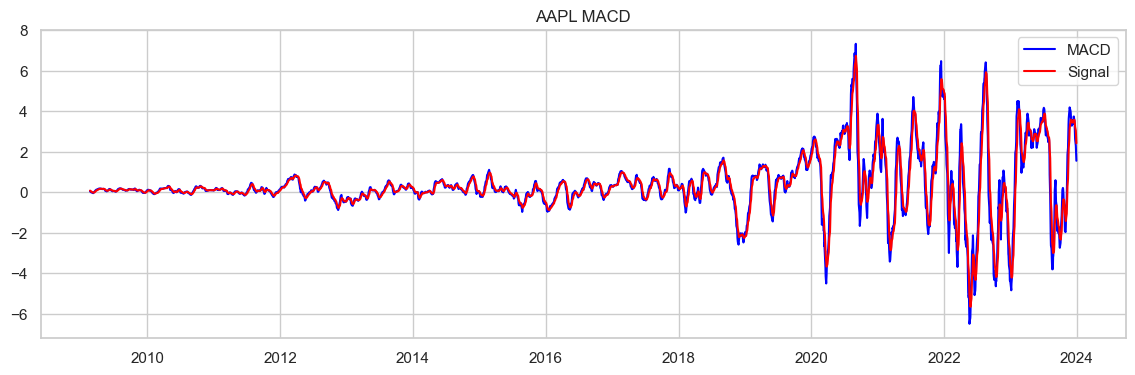

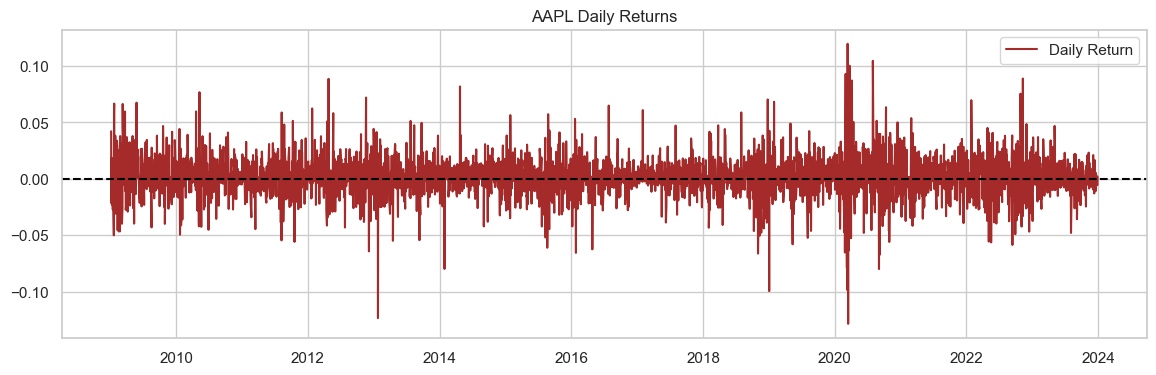

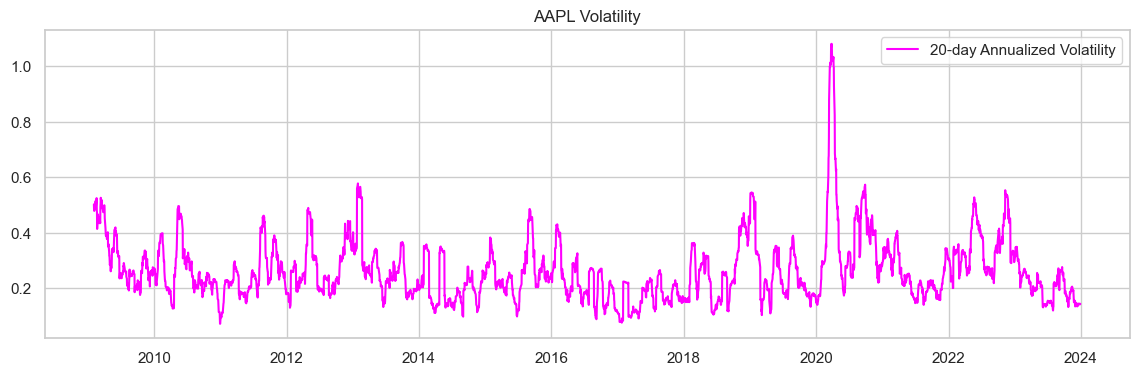

--- AMZN ---


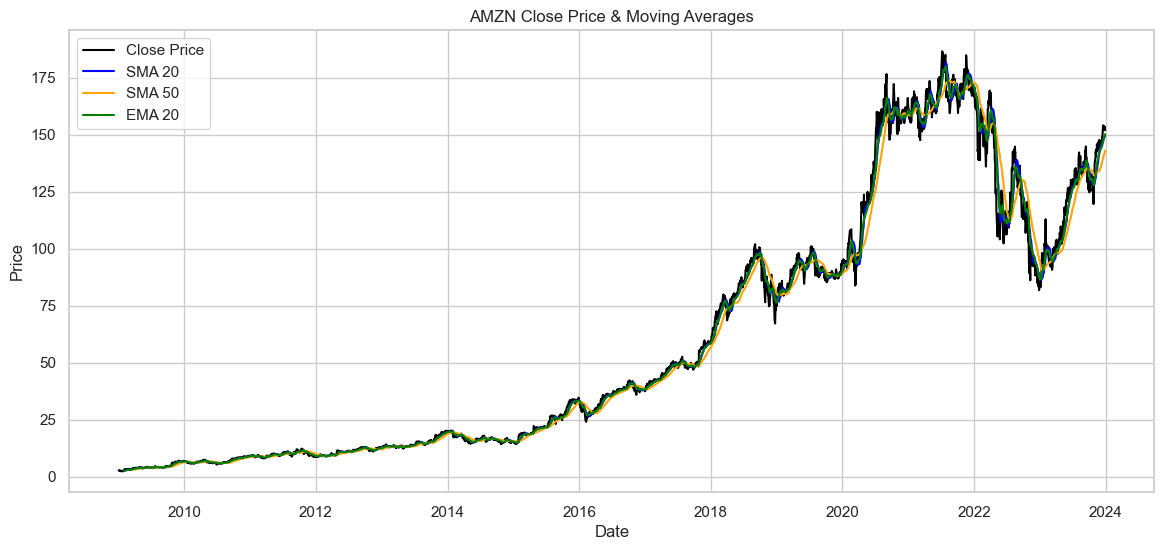

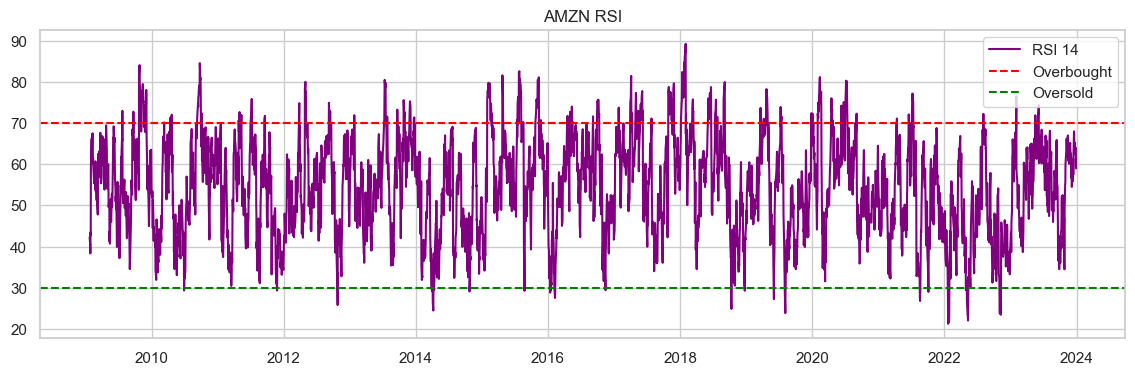

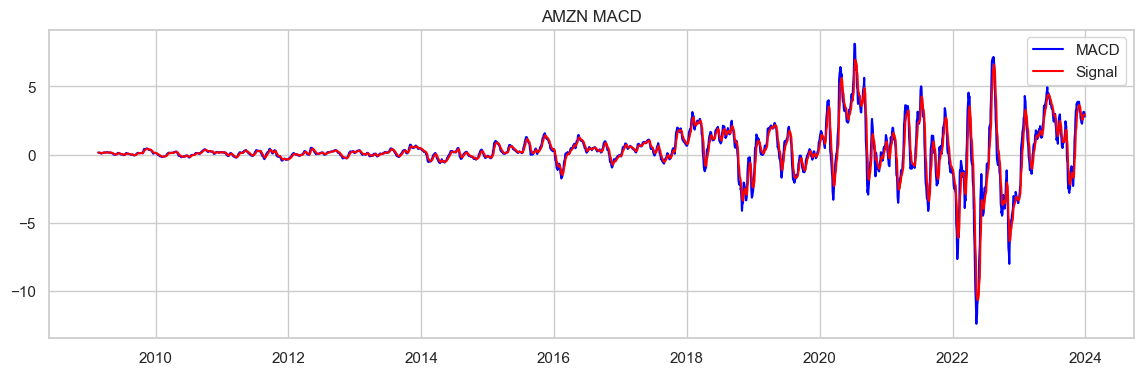

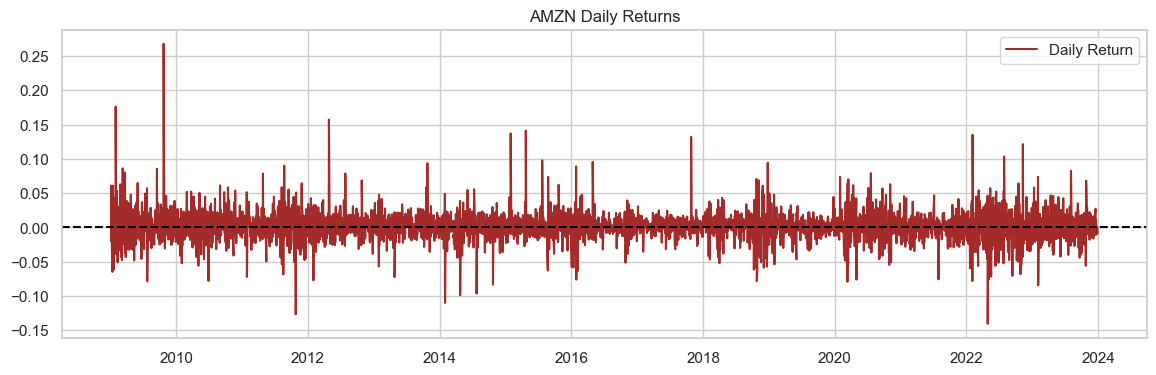

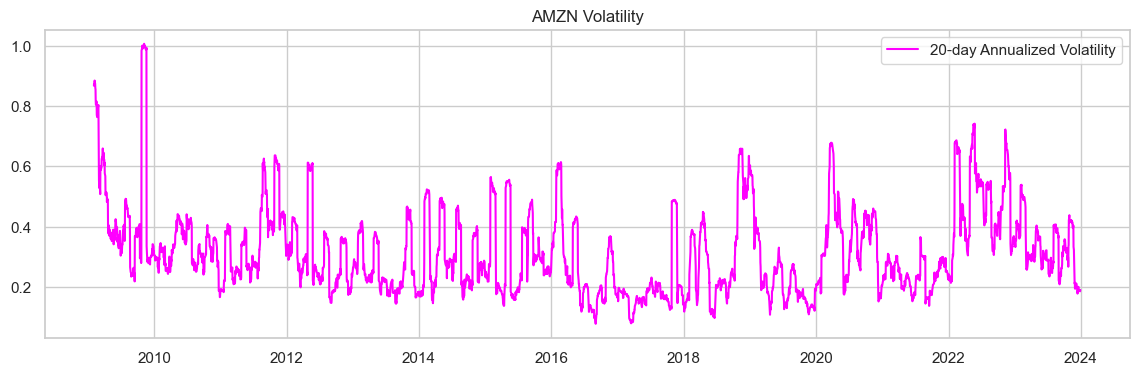

--- GOOG ---


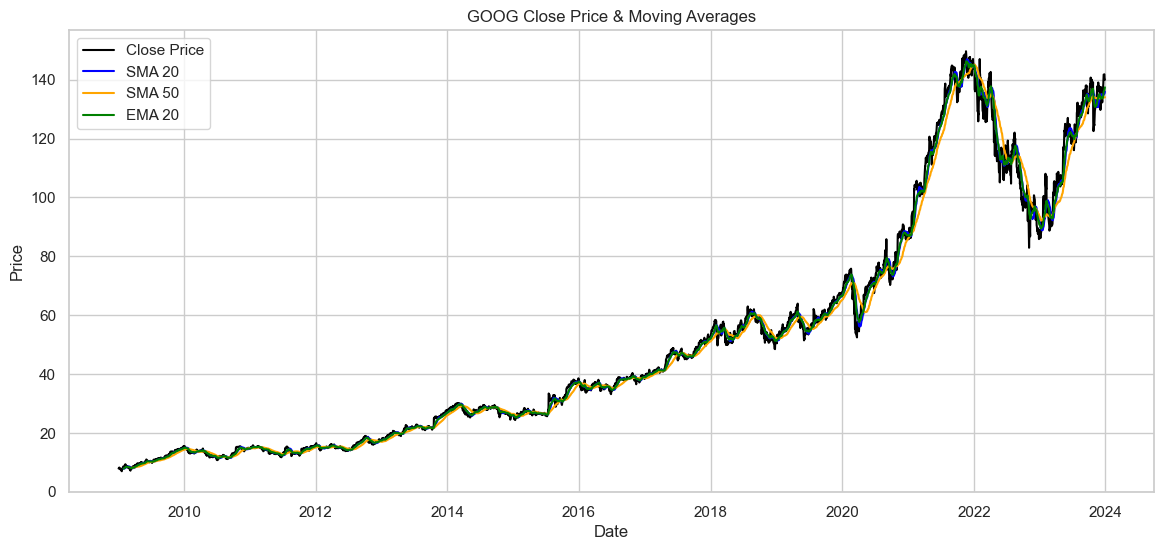

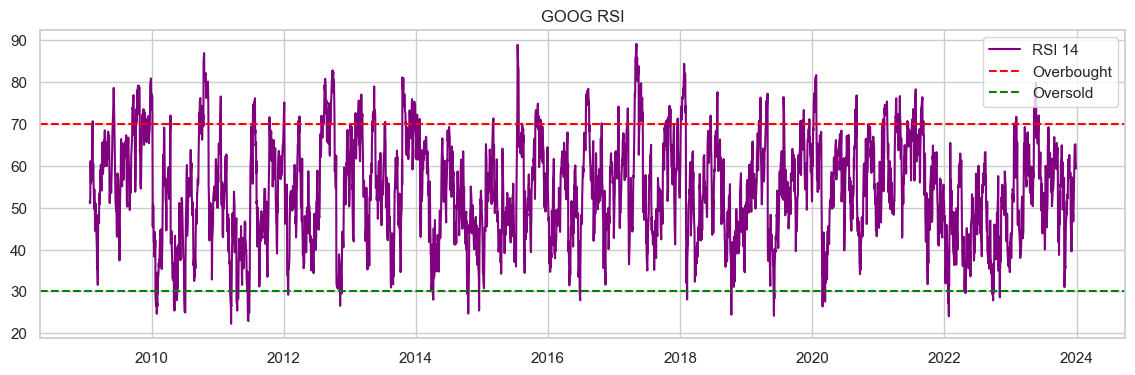

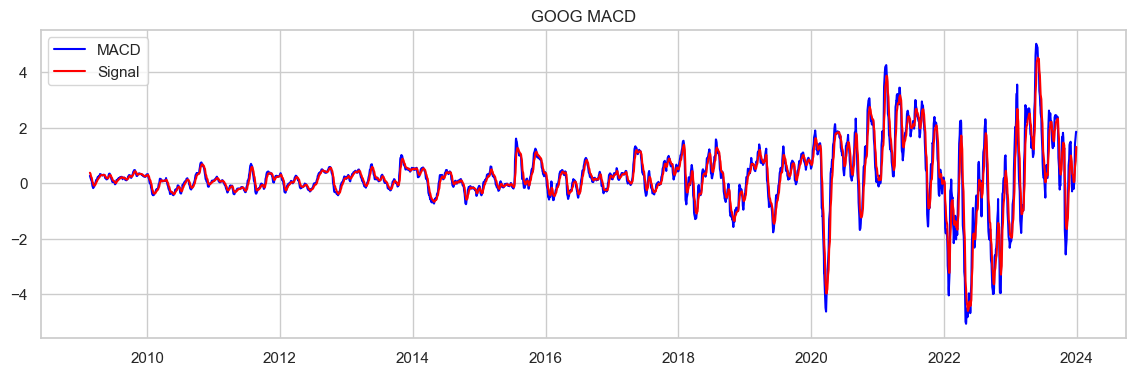

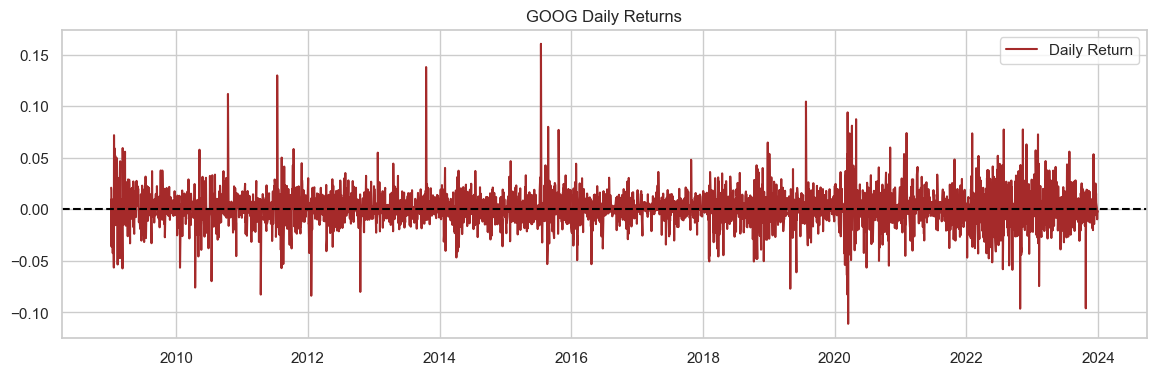

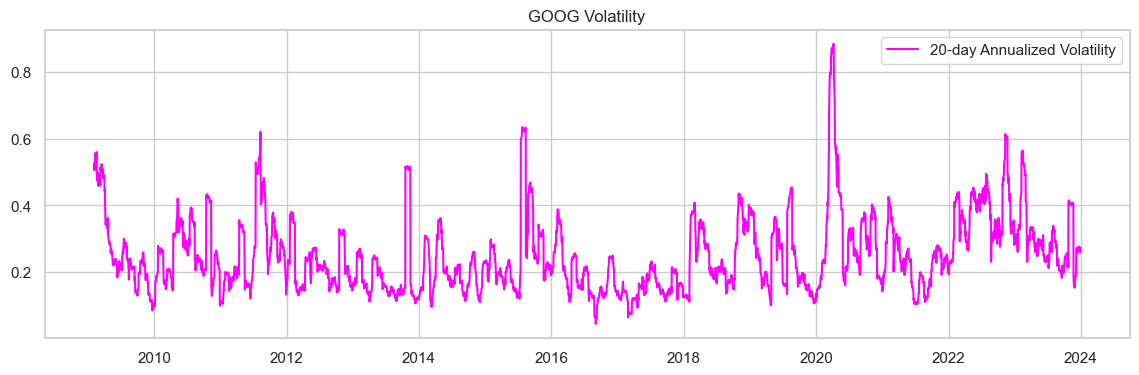

--- META ---


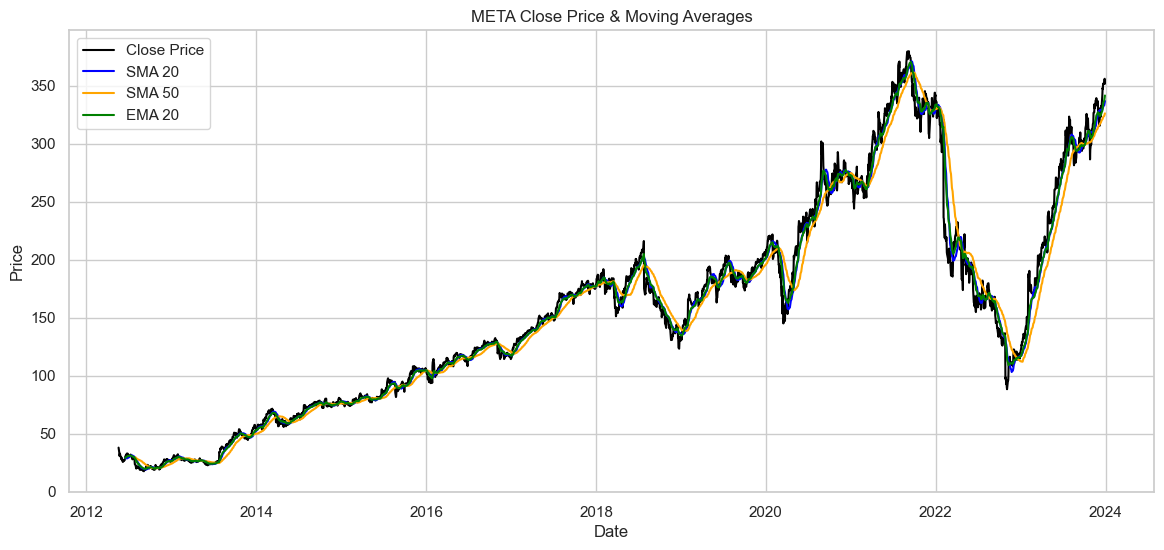

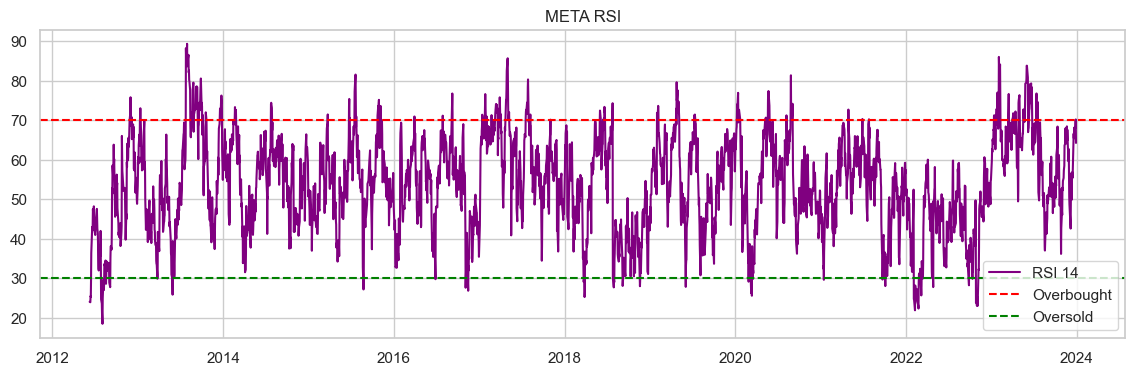

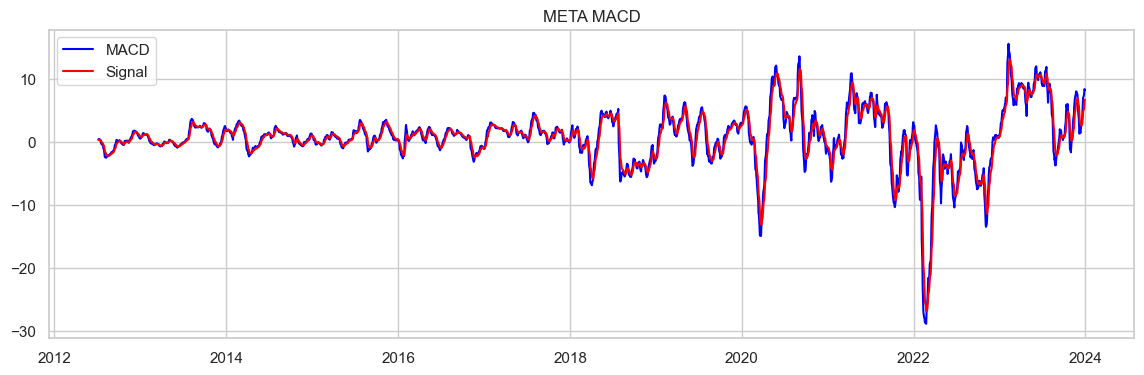

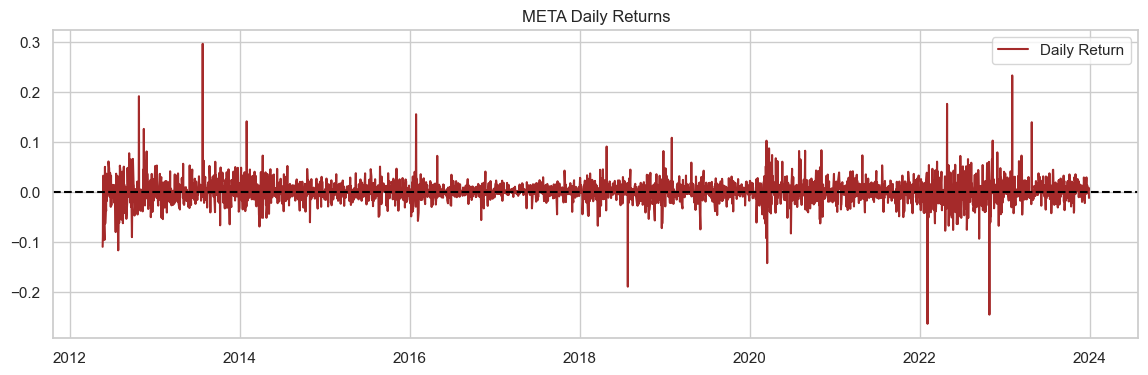

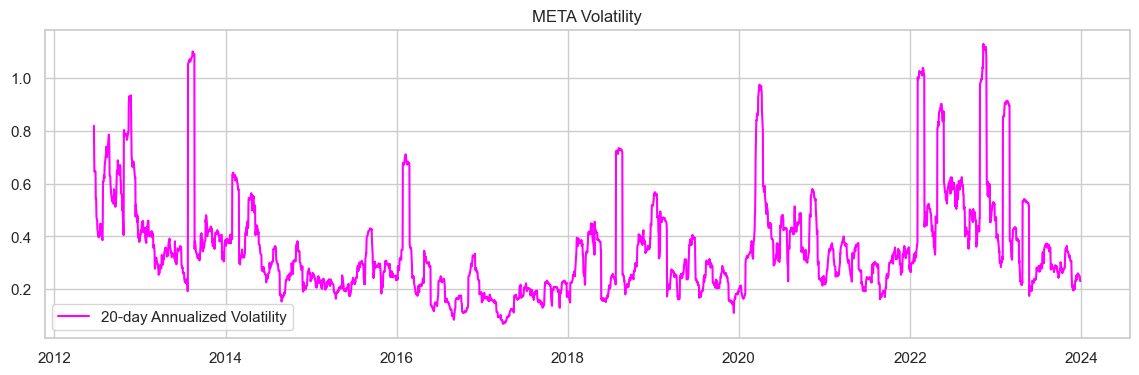

--- MSFT ---


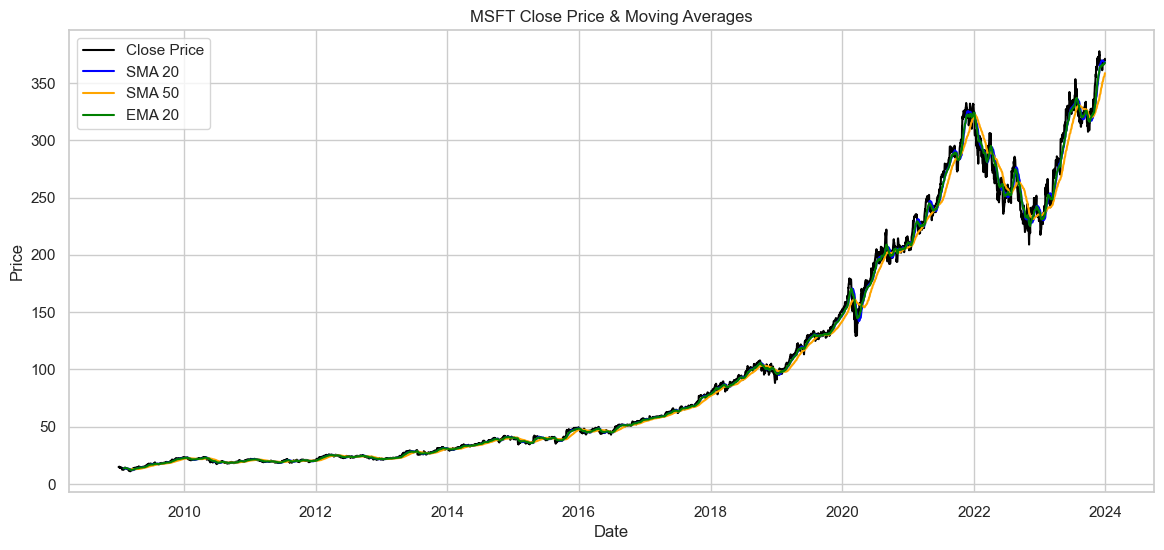

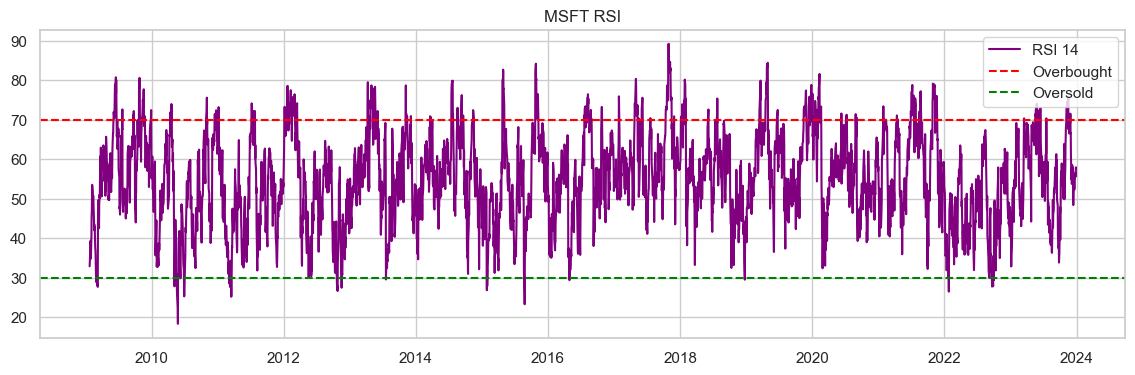

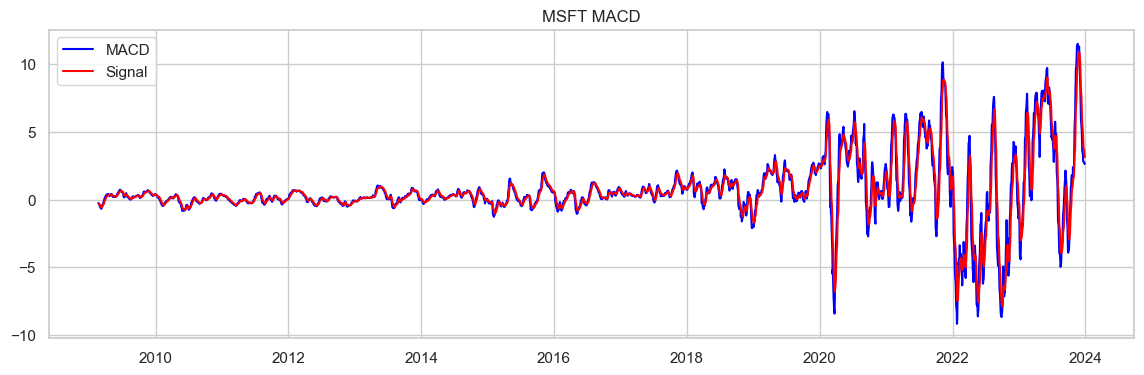

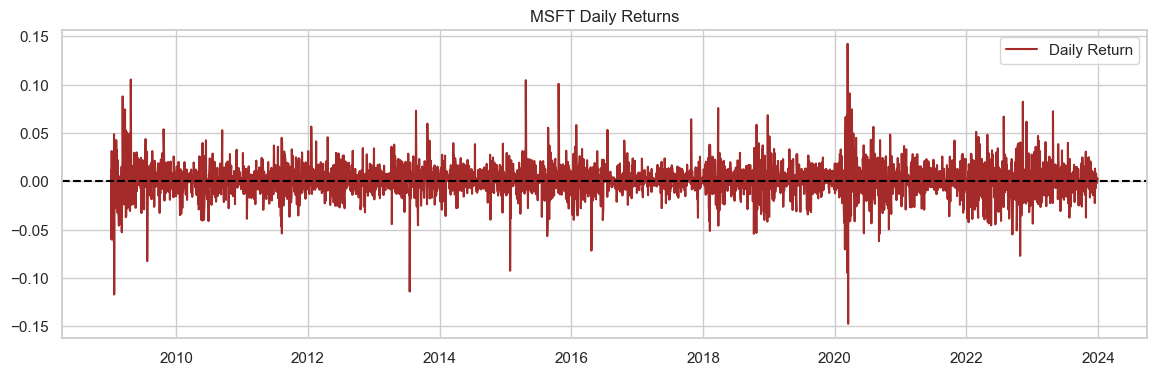

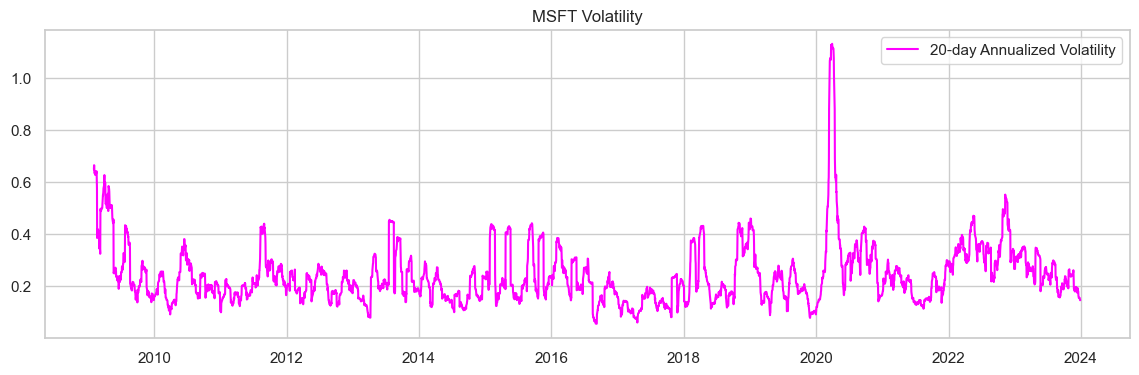

--- NVDA ---


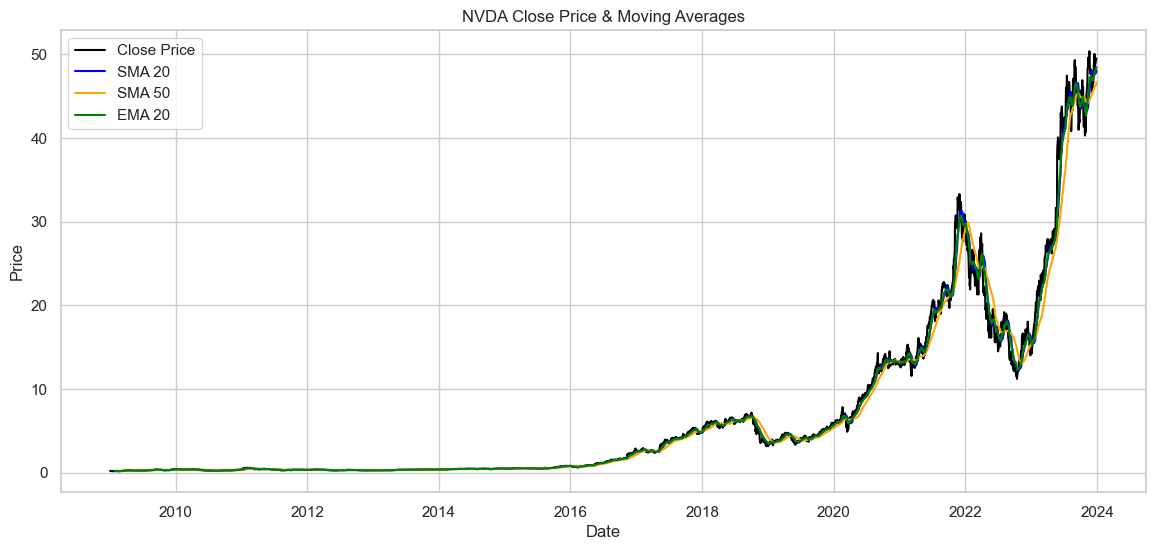

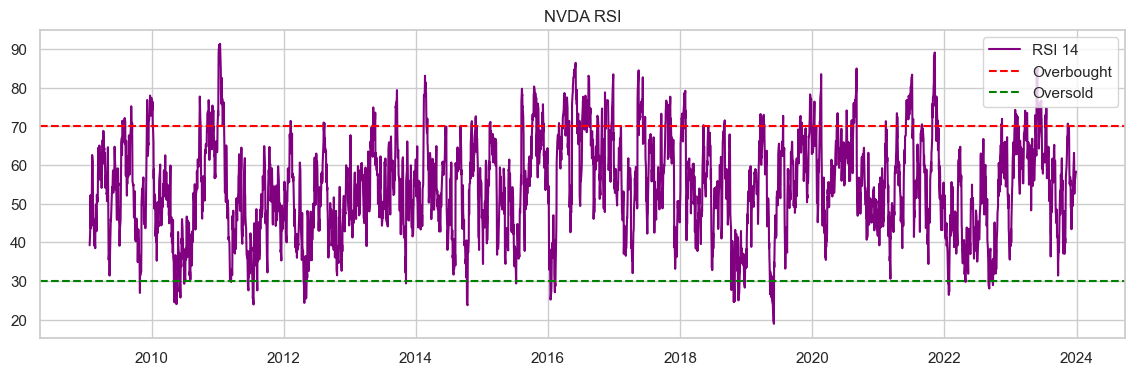

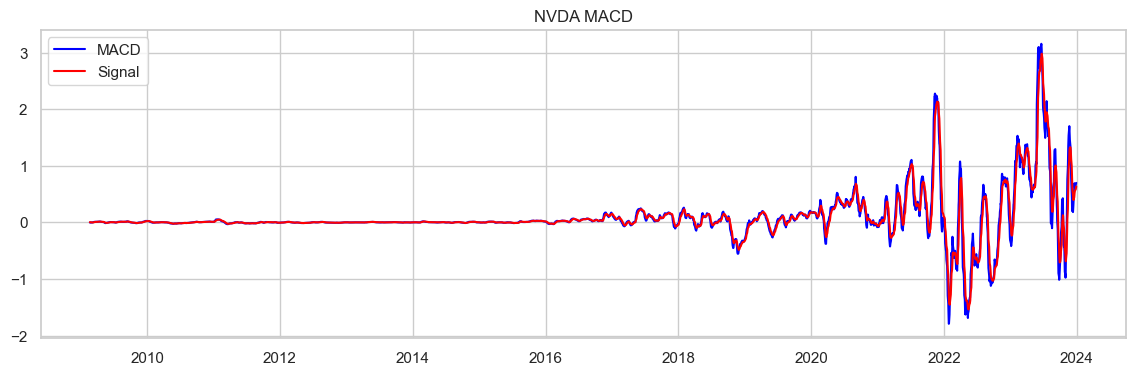

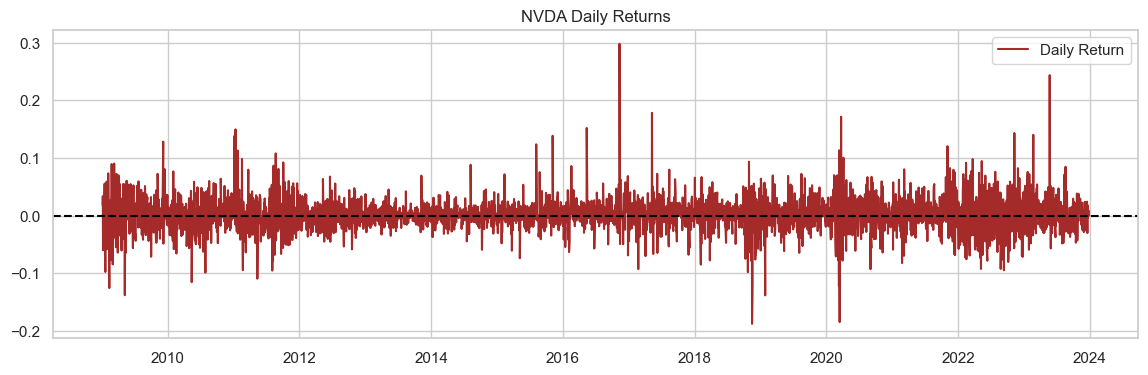

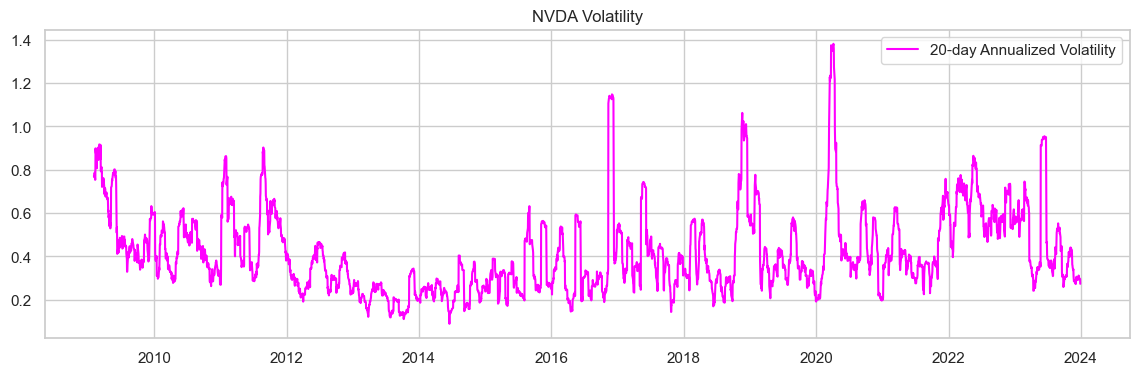

In [10]:
for stock_name, stock_df in stocks.items():
    print(f"--- {stock_name} ---")
    plot_price_ma(stock_df, stock_name)
    plot_rsi(stock_df, stock_name)
    plot_macd(stock_df, stock_name)
    plot_daily_returns(stock_df, stock_name)
    plot_volatility(stock_df, stock_name)


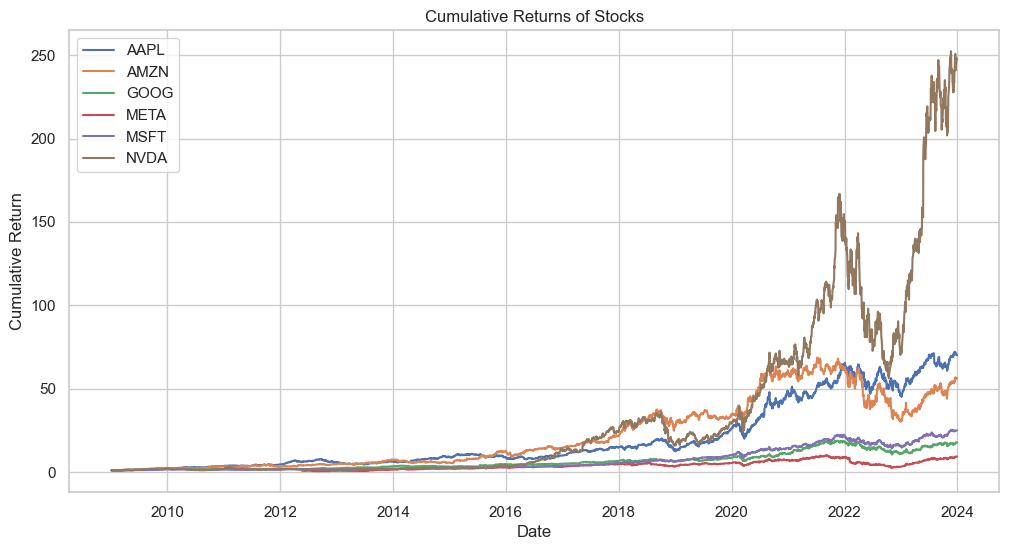

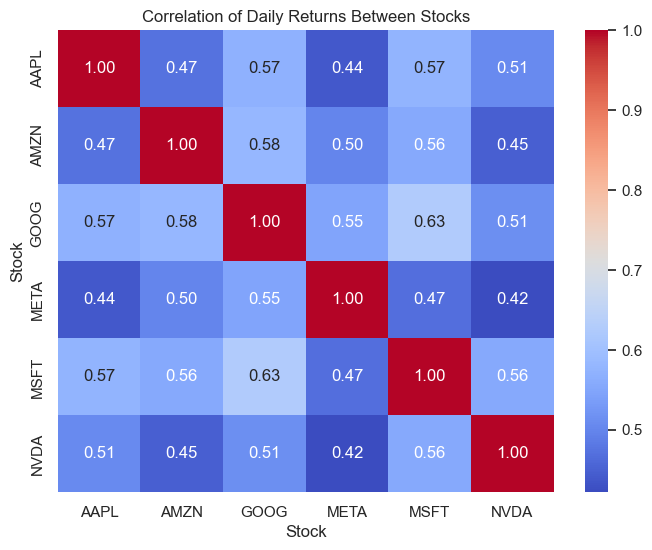

=== Cumulative Returns Insights ===
Observe the growth trajectory of each stock over time. Volatile periods are visible as sharp rises or drops.

=== Correlation Insights ===
High correlation between stocks may indicate sector or market-wide trends. Lower correlation may indicate diversification benefits.


In [12]:
 #--- Ensure Daily Returns are calculated ---
all_stocks['Daily_Return'] = all_stocks.groupby('Stock')['Close'].pct_change()

# --- 1. Cumulative Returns per Stock ---
cumulative_returns = all_stocks.groupby('Stock')['Daily_Return'].apply(lambda x: (1 + x).cumprod())

plt.figure(figsize=(12,6))
for stock in cumulative_returns.index.get_level_values(0).unique():
    plt.plot(cumulative_returns.loc[stock], label=stock)

plt.title("Cumulative Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Daily Returns Correlation Heatmap ---
# Pivot table to align dates as rows and stocks as columns
returns_pivot = all_stocks.pivot_table(index=all_stocks.index, columns='Stock', values='Daily_Return')

# Correlation matrix
corr_matrix = returns_pivot.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Daily Returns Between Stocks")
plt.show()

# --- 3. Insights ---
print("=== Cumulative Returns Insights ===")
print("Observe the growth trajectory of each stock over time. Volatile periods are visible as sharp rises or drops.")

print("\n=== Correlation Insights ===")
print("High correlation between stocks may indicate sector or market-wide trends. Lower correlation may indicate diversification benefits.")


# Task 2: Quantitative Analysis Insights

- **Moving Averages:** SMA and EMA indicate trend direction. Crossovers may signal entry/exit points.
- **RSI Analysis:** Periods above 70 suggest overbought, below 30 oversold.
- **MACD Analysis:** Crossovers of MACD & signal line provide momentum signals.
- **Daily Returns:** Help quantify risk; some stocks are more volatile (NVDA, AAPL).
- **Multi-stock Trends:** Compare relative performance over time; tech stocks often move in tandem during market events.
